In [1]:
# Importing the necessary libraries

import pandas as pd
import numpy as np
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, f1_score
import matplotlib.pyplot as plt

In [2]:
# Importing the wisconsin breast cancer dataset

data=pd.read_csv("/content/drive/MyDrive/data.csv")
display(data)

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,...,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,...,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,...,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,...,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,...,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,926424,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,NaN
565,926682,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,NaN
566,926954,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,NaN
567,927241,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,NaN


In [3]:
# Retaining the necessary columns

data=data.drop(['Unnamed: 32'], axis=1)

In [4]:
# Checking for null values

data.isnull().sum()

id                         0
diagnosis                  0
radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64

B    357
M    212
Name: diagnosis, dtype: int64

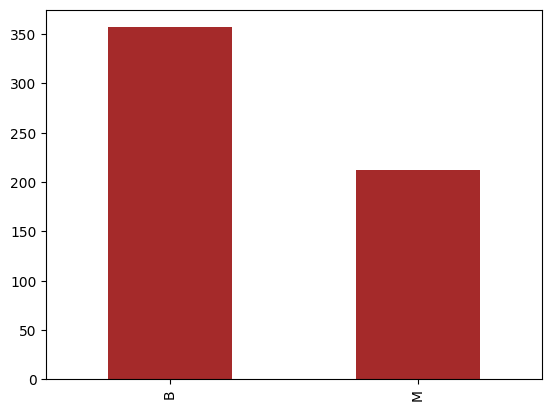

In [5]:
# Checking for class imbalance

data.diagnosis.value_counts().plot(kind='bar',color='brown')
data.diagnosis.value_counts()

In [6]:
# Spliting the data into features and target variable

X=data.iloc[:, 2:] 
y=data['diagnosis']

In [7]:
# Split the data into training and testing sets

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [8]:
# List of various activation funstions

activation_functions=['identity', 'logistic', 'tanh', 'relu']

best_accuracy=0
best_activation_function=''
best_model=None
count=0

<ipython-input-9-1a7824457053>:42: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df=results_df.append(results_df_2, ignore_index=True)
<ipython-input-9-1a7824457053>:42: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df=results_df.append(results_df_2, ignore_index=True)
<ipython-input-9-1a7824457053>:42: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df=results_df.append(results_df_2, ignore_index=True)


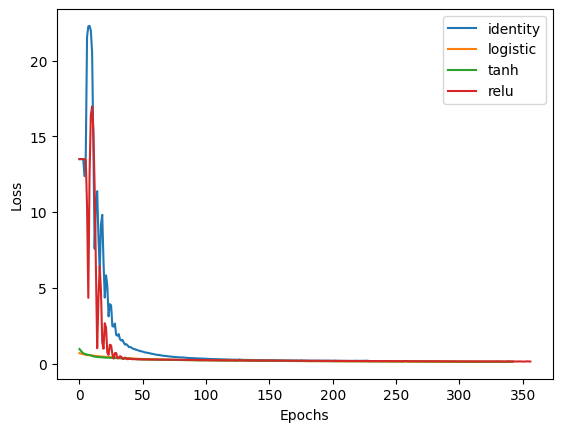

In [9]:
# Iterating over the activation functions and training the model

for activation_function in activation_functions:
    model=MLPClassifier(hidden_layer_sizes=(100,),activation=activation_function,max_iter=1000,random_state=42)
    
    # Sampling the initial parameters k0 and k1 from normal distribution
    k0=np.random.normal()
    k1=np.random.normal()
    
    # Defining a custom activation function with initial parameters k0 and k1
    def custom_activation(x):
        return k0+k1*x
    
    model._activation=custom_activation
    
    # Training the model
    model.fit(X_train, y_train)
    
    # Predicting the target variable for the test set
    y_pred=model.predict(X_test)
    
    # Calculating the accuracy score
    accuracy=accuracy_score(y_test, y_pred)
    
    # Calculating the F1-Score
    f1=f1_score(y_test, y_pred, average='weighted')
    
    # Finding the activation function that gives the best accuracy
    if accuracy>best_accuracy:
        best_accuracy=accuracy
        best_activation_function=activation_function
        best_model=model
    
    # Plotting the loss function vs. epochs
    plt.plot(range(model.n_iter_), model.loss_curve_, label=activation_function)

    # Storing the results in a dataframe
    if count==0:
      results_df=pd.DataFrame(data=[[activation_function,best_accuracy]], columns=['Activation Function', 'Model Accuracy'])
    else:
      results_df_2=pd.DataFrame(data=[[activation_function,best_accuracy]], columns=['Activation Function', 'Model Accuracy'])
      results_df=results_df.append(results_df_2, ignore_index=True)
    count+=1

# Plotting the loss function vs. epochs

plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [10]:
# Printing the best activation function

print("Best activation function:", best_activation_function)

Best activation function: logistic


In [11]:
# Printing the final parameter values at the end of training

final_parameters=[k0, k1]
print("Final parameter values:", final_parameters)

Final parameter values: [-1.213398469890955, -1.4231619063773493]


In [12]:
# Calculating the train accuracy and F1-Score

y_train_pred=best_model.predict(X_train)
train_accuracy=accuracy_score(y_train, y_train_pred)
train_f1=f1_score(y_train, y_train_pred, average='weighted')
print("Train accuracy:", train_accuracy)
print("Train F1-Score:", train_f1)

Train accuracy: 0.9522613065326633
Train F1-Score: 0.9519416866894206


In [13]:
# Calculating the test accuracy and F1-Score

test_accuracy=best_accuracy
test_f1=f1_score(y_test, y_pred, average='weighted')
print("Test accuracy:", test_accuracy)
print("Test F1-Score:", test_f1)

Test accuracy: 0.9707602339181286
Test F1-Score: 0.9647902680643603


In [14]:
# Comparing the activation functions

display(results_df)

,Activation Function,Model Accuracy
0,identity,0.959064
1,logistic,0.970760
2,tanh,0.970760
3,relu,0.970760
